In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from random import gauss, seed
from scipy import stats
import seaborn as sns
from mpl_toolkits import mplot3d
import sklearn.metrics as metrics
import statsmodels.api as sm

%matplotlib inline

In [6]:
df = pd.read_csv('./zippedData/masterdf.csv')

In [7]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [8]:
# Define a function to map months to seasons
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

df['Seasons'] = df['release_date'].dt.month.map(get_season)
df.head()

,release_date,movie,production_budget,domestic_gross,genres,studio,foreign_gross,domestic_ROI_percent,domestic_Profit,Seasons
0,2011-05-20,PiratesoftheCaribbeanOnStrangerTides,410600000,241063875,"Action,Adventure,Fantasy",BV,804600000,58.710150,-169536125,Spring
1,2015-05-01,AvengersAgeofUltron,330600000,459005868,"Action,Adventure,Sci-Fi",BV,946400000,138.840250,128405868,Spring
2,2017-12-15,StarWarsTheLastJedi,317000000,620181382,"Action,Adventure,Fantasy",BV,712400000,195.640815,303181382,Winter
3,2015-12-18,StarWarsTheForceAwakens,306000000,936662225,"Action,Adventure,Fantasy",BV,"1,131.6",306.098766,630662225,Winter
4,2018-04-27,AvengersInfinityWar,300000000,678815482,"Action,Adventure,Sci-Fi",BV,"1,369.5",226.271827,378815482,Spring


In [9]:
genres = df['genres'].str.split(',', expand=True)
unique_genres = set(genres.values.ravel()) - {None}

for genre in unique_genres:
    df[genre] = genres.apply(lambda row: 1 if genre in row.values else 0, axis=1)

df.head(20)

,release_date,movie,production_budget,domestic_gross,genres,studio,foreign_gross,domestic_ROI_percent,domestic_Profit,Seasons,...,Horror,Drama,Sport,Family,Romance,Sci-Fi,Western,History,Music,Fantasy
0,2011-05-20,PiratesoftheCaribbeanOnStrangerTides,410600000,241063875,"Action,Adventure,Fantasy",BV,804600000,58.710150,-169536125,Spring,...,0,0,0,0,0,0,0,0,0,1
1,2015-05-01,AvengersAgeofUltron,330600000,459005868,"Action,Adventure,Sci-Fi",BV,946400000,138.840250,128405868,Spring,...,0,0,0,0,0,1,0,0,0,0
2,2017-12-15,StarWarsTheLastJedi,317000000,620181382,"Action,Adventure,Fantasy",BV,712400000,195.640815,303181382,Winter,...,0,0,0,0,0,0,0,0,0,1
3,2015-12-18,StarWarsTheForceAwakens,306000000,936662225,"Action,Adventure,Fantasy",BV,"1,131.6",306.098766,630662225,Winter,...,0,0,0,0,0,0,0,0,0,1
4,2018-04-27,AvengersInfinityWar,300000000,678815482,"Action,Adventure,Sci-Fi",BV,"1,369.5",226.271827,378815482,Spring,...,0,0,0,0,0,1,0,0,0,0
5,2017-11-17,JusticeLeague,300000000,229024295,"Action,Adventure,Fantasy",WB,428900000,76.341432,-70975705,Autumn,...,0,0,0,0,0,0,0,0,0,1
6,2015-11-06,Spectre,300000000,200074175,"Action,Adventure,Thriller",Sony,680600000,66.691392,-99925825,Autumn,...,0,0,0,0,0,0,0,0,0,0
7,2012-07-20,TheDarkKnightRises,275000000,448139099,"Action,Thriller",WB,636800000,162.959672,173139099,Summer,...,0,0,0,0,0,0,0,0,0,0
8,2018-05-25,SoloAStarWarsStory,275000000,213767512,"Action,Adventure,Sci-Fi",BV,179200000,77.733641,-61232488,Spring,...,0,0,0,0,0,1,0,0,0,0
9,2013-07-02,TheLoneRanger,275000000,89302115,"Action,Adventure,Western",BV,171200000,32.473496,-185697885,Summer,...,0,0,0,0,0,0,1,0,0,0


In [10]:
#df.to_csv('./zippedData/TableauDF.csv', index=False)

In [11]:
df_sorted = df.sort_values(by='domestic_Profit', ascending=False)

In [12]:
df_sorted.head(10)

,release_date,movie,production_budget,domestic_gross,genres,studio,foreign_gross,domestic_ROI_percent,domestic_Profit,Seasons,...,Horror,Drama,Sport,Family,Romance,Sci-Fi,Western,History,Music,Fantasy
3,2015-12-18,StarWarsTheForceAwakens,306000000,936662225,"Action,Adventure,Fantasy",BV,"1,131.6",306.098766,630662225,Winter,...,0,0,0,0,0,0,0,0,0,1
28,2018-02-16,BlackPanther,200000000,700059566,"Action,Adventure,Sci-Fi",BV,646900000,350.029783,500059566,Winter,...,0,0,0,0,0,1,0,0,0,0
24,2015-06-12,JurassicWorld,215000000,652270625,"Action,Adventure,Sci-Fi",Uni.,"1,019.4",303.381686,437270625,Summer,...,0,0,0,0,0,1,0,0,0,0
29,2018-06-15,Incredibles2,200000000,608581744,NaN,BV,634200000,304.290872,408581744,Summer,...,0,0,0,0,0,0,0,0,0,0
19,2012-05-04,TheAvengers,225000000,623279547,"Action,Adventure,Sci-Fi",BV,NaN,277.013132,398279547,Spring,...,0,0,0,0,0,1,0,0,0,0
4,2018-04-27,AvengersInfinityWar,300000000,678815482,"Action,Adventure,Sci-Fi",BV,"1,369.5",226.271827,378815482,Spring,...,0,0,0,0,0,1,0,0,0,0
95,2017-03-17,BeautyandtheBeast,160000000,504014165,"Family,Fantasy,Musical",NaN,NaN,315.008853,344014165,Spring,...,0,0,0,1,0,0,0,0,0,1
30,2016-12-16,RogueOneAStarWarsStory,200000000,532177324,"Action,Adventure,Sci-Fi",BV,523900000,266.088662,332177324,Winter,...,0,0,0,0,0,1,0,0,0,0
278,2012-03-23,TheHungerGames,80000000,408010692,"Action,Adventure,Sci-Fi",LGF,286400000,510.013365,328010692,Spring,...,0,0,0,0,0,1,0,0,0,0
250,2017-12-20,JumanjiWelcometotheJungle,90000000,404508916,"Action,Adventure,Comedy",Sony,557600000,449.454351,314508916,Winter,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df_sorted.loc[95 , 'studio'] = 'BV'

In [14]:
df_sorted.head(10)

,release_date,movie,production_budget,domestic_gross,genres,studio,foreign_gross,domestic_ROI_percent,domestic_Profit,Seasons,...,Horror,Drama,Sport,Family,Romance,Sci-Fi,Western,History,Music,Fantasy
3,2015-12-18,StarWarsTheForceAwakens,306000000,936662225,"Action,Adventure,Fantasy",BV,"1,131.6",306.098766,630662225,Winter,...,0,0,0,0,0,0,0,0,0,1
28,2018-02-16,BlackPanther,200000000,700059566,"Action,Adventure,Sci-Fi",BV,646900000,350.029783,500059566,Winter,...,0,0,0,0,0,1,0,0,0,0
24,2015-06-12,JurassicWorld,215000000,652270625,"Action,Adventure,Sci-Fi",Uni.,"1,019.4",303.381686,437270625,Summer,...,0,0,0,0,0,1,0,0,0,0
29,2018-06-15,Incredibles2,200000000,608581744,NaN,BV,634200000,304.290872,408581744,Summer,...,0,0,0,0,0,0,0,0,0,0
19,2012-05-04,TheAvengers,225000000,623279547,"Action,Adventure,Sci-Fi",BV,NaN,277.013132,398279547,Spring,...,0,0,0,0,0,1,0,0,0,0
4,2018-04-27,AvengersInfinityWar,300000000,678815482,"Action,Adventure,Sci-Fi",BV,"1,369.5",226.271827,378815482,Spring,...,0,0,0,0,0,1,0,0,0,0
95,2017-03-17,BeautyandtheBeast,160000000,504014165,"Family,Fantasy,Musical",BV,NaN,315.008853,344014165,Spring,...,0,0,0,1,0,0,0,0,0,1
30,2016-12-16,RogueOneAStarWarsStory,200000000,532177324,"Action,Adventure,Sci-Fi",BV,523900000,266.088662,332177324,Winter,...,0,0,0,0,0,1,0,0,0,0
278,2012-03-23,TheHungerGames,80000000,408010692,"Action,Adventure,Sci-Fi",LGF,286400000,510.013365,328010692,Spring,...,0,0,0,0,0,1,0,0,0,0
250,2017-12-20,JumanjiWelcometotheJungle,90000000,404508916,"Action,Adventure,Comedy",Sony,557600000,449.454351,314508916,Winter,...,0,0,0,0,0,0,0,0,0,0


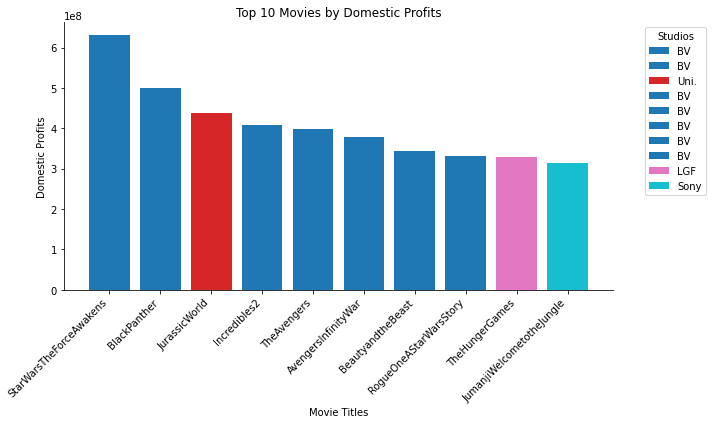

In [15]:
top_10_movies = df_sorted.head(10)
# Get unique studios
unique_studios = top_10_movies['studio'].unique()
# Define colors for each unique studio
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_studios)))

# Create a dictionary to map studios to colors
color_dict = dict(zip(unique_studios, colors))

# Plotting
plt.figure(figsize=(10, 6))

# Iterate over each movie and plot its bar with corresponding color
for i, (movie, profit, studio) in enumerate(zip(top_10_movies['movie'], top_10_movies['domestic_Profit'], top_10_movies['studio'])):
    plt.bar(i, profit, color=color_dict.get(studio, 'gray'), label=studio)

plt.xlabel('Movie Titles')
plt.ylabel('Domestic Profits')
plt.title('Top 10 Movies by Domestic Profits')
plt.xticks(np.arange(10), top_10_movies['movie'], rotation=45, ha='right')  # Set x-axis ticks and labels
plt.legend(title='Studios', bbox_to_anchor=(1.05, 1), loc='upper left')  # Add legend
plt.gca().spines['top'].set_visible(False)  # Hide top spine
plt.gca().spines['right'].set_visible(False)  # Hide right spine

plt.tight_layout()
plt.show()

In [19]:
X = np.array([1.5, 3.5, 5.5])
Y = np.array([2, 9, 10])
X_plus_c = sm.add_constant(X) 
# you have to add the y-int to the equation manually in statsmodels (put X and not Y) Then, call uppercase OLS and the method fit:
model = sm.OLS(Y, X_plus_c).fit()
model.summary()

c:\Users\Trugrit\anaconda3\envs\learn-env\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     5.333
Date:                Wed, 27 Mar 2024   Prob (F-statistic):              0.260
Time:                        11:37:04   Log-Likelihood:                -5.2965
No. Observations:                   3   AIC:                             14.59
Df Residuals:                       1   BIC:                             12.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.332e-15      3.345   3.98e-16      1.000     -42.499      42.499
x1             2.0000      0.866      2.309      0.260      -9.004      13.004
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.000
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.531
Skew:                           0.707   Prob(JB):                        0.767
Kurtosis:                       1.500   Cond. No.                         9.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<ipython-input-21-877c584dc7c6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bv_movies['year'] = pd.to_datetime(bv_movies['release_date']).dt.year


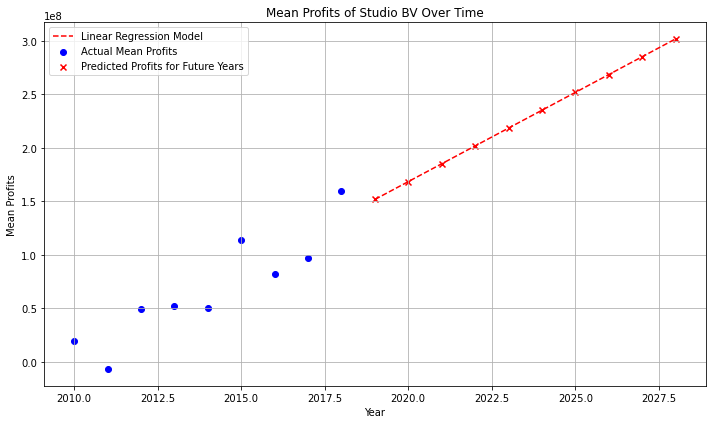

In [21]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing movie data, and it has columns 'release_date', 'studio', and 'profits'
# Filter data for movies produced by studio BV
bv_movies = df[df['studio'] == 'BV']

# Extract year from release_date
bv_movies['year'] = pd.to_datetime(bv_movies['release_date']).dt.year

# Calculate mean profits for each year
mean_profits_by_year = bv_movies.groupby('year')['domestic_Profit'].mean().reset_index()

# Prepare data for linear regression
X = mean_profits_by_year[['year']]  # Features (year)
y = mean_profits_by_year['domestic_Profit']  # Target variable (mean profits)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict mean profits for future years (e.g., next 10 years)
future_years = pd.DataFrame({'year': range(mean_profits_by_year['year'].max() + 1, mean_profits_by_year['year'].max() + 11)})
predicted_profits = model.predict(future_years[['year']])

# Plotting
plt.figure(figsize=(10, 6))

# Plot actual mean profits
plt.scatter(mean_profits_by_year['year'], mean_profits_by_year['domestic_Profit'], color='blue', label='Actual Mean Profits')

# Plot linear regression line
plt.plot(future_years['year'], predicted_profits, color='red', linestyle='--', label='Linear Regression Model')

# Plot predicted profits for future years
plt.scatter(future_years['year'], predicted_profits, color='red', marker='x', label='Predicted Profits for Future Years')

plt.xlabel('Year')
plt.ylabel('Mean Profits')
plt.title('Mean Profits of Studio BV Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
